Imports and Setup

In [1]:
!pip install pandas matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle

Load and Inspect Data

In [3]:
# Load data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Map target numbers to names for readability
df['species'] = df['target'].map({i: name for i, name in enumerate(data.target_names)})

# Show first 5 rows
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Visualize the relationships between features

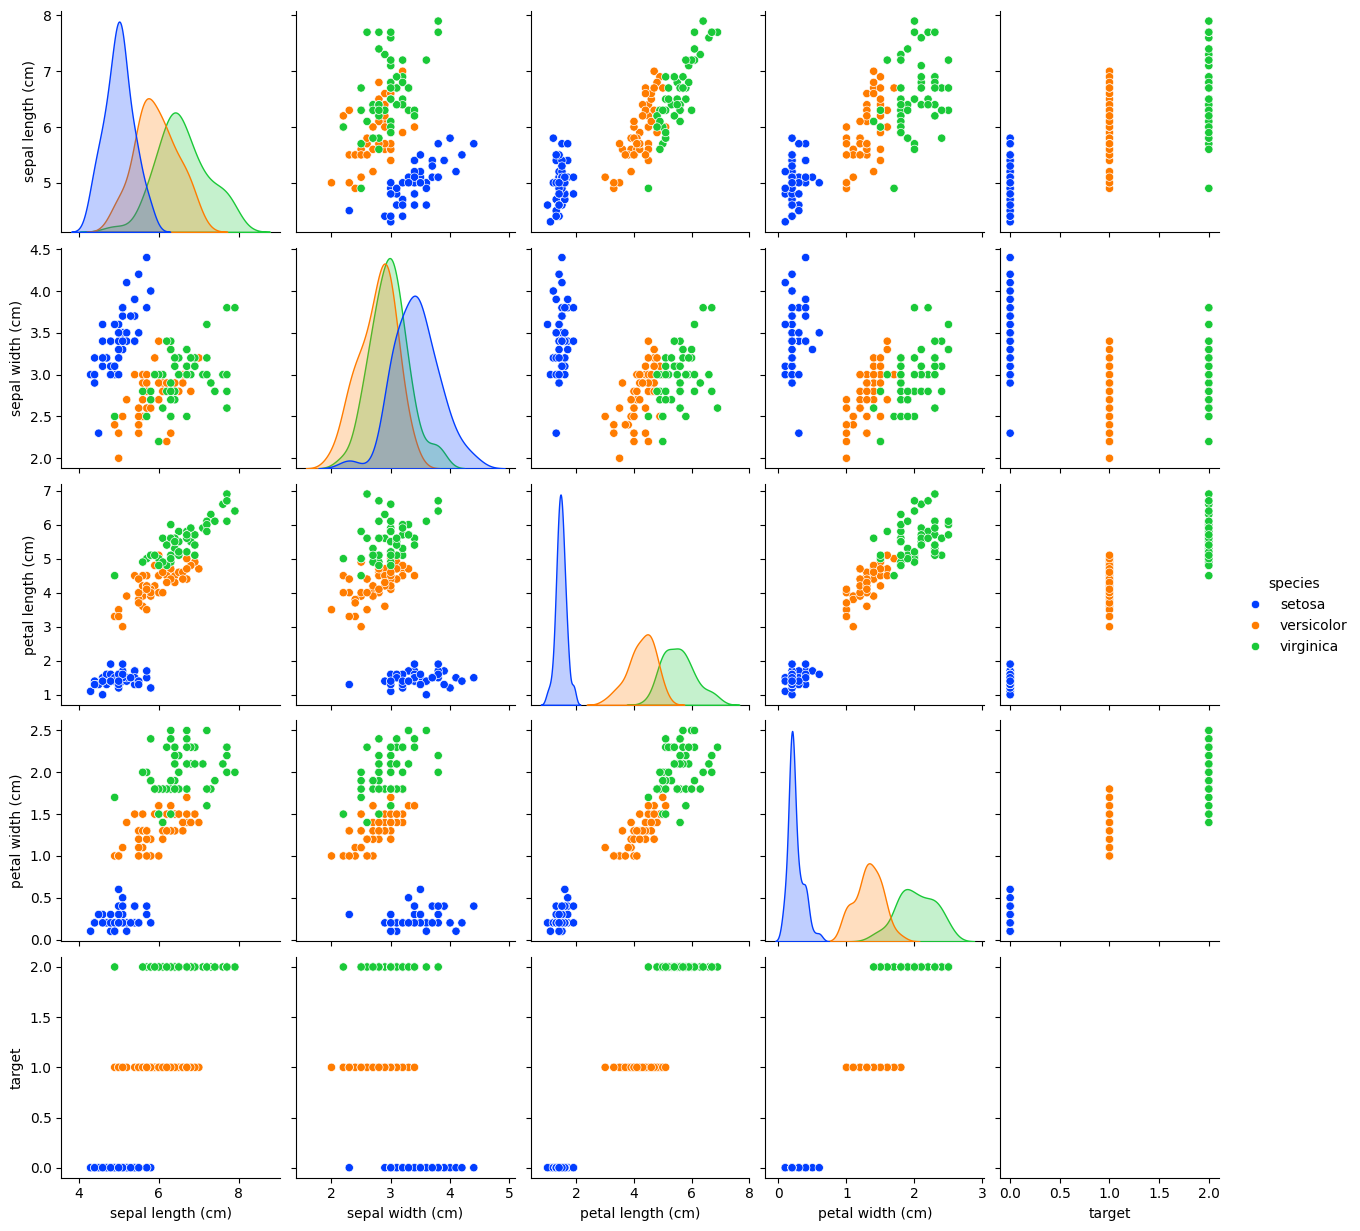

In [4]:
# Create a pairplot to see feature distributions
sns.pairplot(df, hue='species', palette='bright', diag_kind='kde')
plt.show()

Data Splitting

In [5]:
# Split data
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training ML Model

In [6]:
# Initialize and Train
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Evaluation and Visualization

In [7]:
# Generate predictions
y_pred = clf.predict(X_test)

In [8]:
# Calculate metrics
acc = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Test Set Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



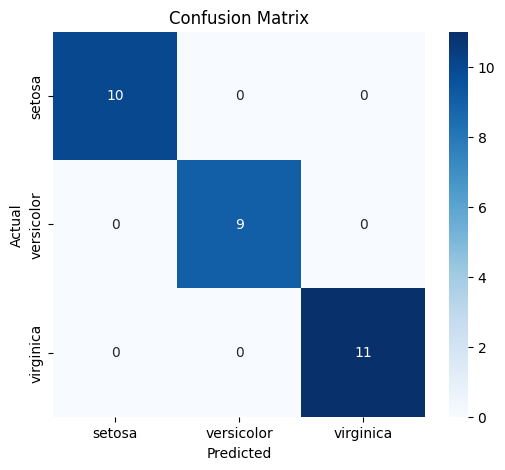

In [9]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

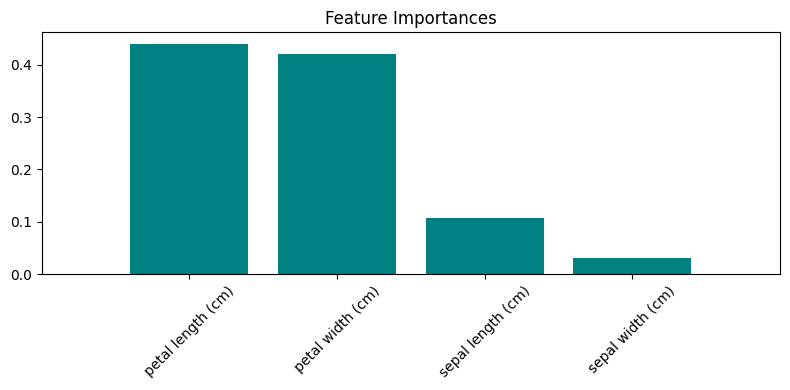

In [10]:
# Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 4))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='teal')
plt.xticks(range(X.shape[1]), [data.feature_names[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [11]:
filename = 'model.pkl'
with open(filename, 'wb') as f:
    # Saving model + metadata so we know what the classes are later
    pickle.dump((clf, data.feature_names, data.target_names), f)

print(f"Model saved successfully to {filename}")

Model saved successfully to model.pkl
